# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

1335c4470289b65e7bbb5459b399e92e


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['talnakh',
 'taolanaro',
 'faya',
 'daru',
 'hithadhoo',
 'bluff',
 'arraial do cabo',
 'banda aceh',
 'rikitea',
 'bredasdorp',
 'airai',
 'mataura',
 'ushuaia',
 'pevek',
 'cape town',
 'jintur',
 'saint-philippe',
 'port alfred',
 'attawapiskat',
 'busselton',
 'macaboboni',
 'hermanus',
 'iqaluit',
 'riverton',
 'hobart',
 'faanui',
 'new norfolk',
 'dandong',
 'jamestown',
 'butaritari',
 'samusu',
 'san patricio',
 'albany',
 'tiksi',
 'nhulunbuy',
 'goderich',
 'castro',
 'paamiut',
 'nikolskoye',
 'thompson',
 'nieuw amsterdam',
 'sterling',
 'uwayl',
 'vostok',
 'valdivia',
 'punta arenas',
 'geraldton',
 'teknaf',
 'cabo san lucas',
 'ussuriysk',
 'fevralsk',
 'nanortalik',
 'west bay',
 'kapaa',
 'sur',
 'college',
 'tsuruga',
 'praia da vitoria',
 'chifeng',
 'hofn',
 'illoqqortoormiut',
 'mitu',
 'khandyga',
 'manzil tamim',
 'atar',
 'naze',
 'tuktoyaktuk',
 'georgetown',
 'vardo',
 'puerto ayora',
 'cherskiy',
 'longyearbyen',
 'vila velha',
 'tupa',
 'qinhuangdao',
 'l

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# Save config information.
#api call - api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = url + "&q="
#print(query_url)


# 4 pieces of info to get
temp = []
humidity = []
cloudiness = []
wind_speed = []
weather_dict = []


#need to loop through your cities to gather info from each one and put that into a df
for city in cities: 
    try:
        response = requests.get(query_url + city + "&appid=1335c4470289b65e7bbb5459b399e92e").json()
        weather_dict.append({
                        "city": city,
                        "latitude": response['coord']['lat'],
                        "longitude": response['coord']['lon'],
                        "temperature": response['main']['temp'],
                        "humidity": response['main']['humidity'],
                        "cloudiness": response['clouds']['all'],
                        "wind speed": response['clouds']['all']
        })
        #print(weather_dict)
        print(f'City number {number} of {len(cities)}. | {city}')
    except:
        print("No data for", city)
    
# sayat = f"{url}q=sayat&appid={weather_api_key}"
# print(sayat)
# sayat_response = requests.get(sayat)
# sayat_response.json()

#json.dumps(response, indent=4, sort_keys=True)

No data for taolanaro
No data for attawapiskat
No data for macaboboni
No data for samusu
No data for uwayl
No data for fevralsk
No data for illoqqortoormiut
No data for manzil tamim
No data for sentyabrskiy
No data for bo
No data for bolungarvik
No data for axixa do tocantins
No data for barentsburg
No data for tabiauea
No data for aflu
No data for belushya guba
No data for phan rang
No data for tsihombe
No data for amderma
No data for grand river south east
No data for meyungs
No data for cumaribo
No data for nizhneyansk
No data for wahran
No data for mys shmidta
No data for barawe
No data for vaisala
No data for falealupo
No data for kuva
No data for jabiru
No data for palabuhanratu
No data for vaitupu
No data for tumannyy
No data for bur gabo
No data for ust-kamchatsk
No data for ngukurr
No data for kazalinsk
No data for kuche
No data for louisbourg
No data for phumi samraong
No data for satitoa
No data for saleaula
No data for paradwip
No data for dalinghe
No data for lolua
No data

In [53]:
print(weather_dict)

[{'city': 'talnakh', 'latitude': 69.49, 'longitude': 88.4, 'temperature': 269.15, 'humidity': 79, 'cloudiness': 40, 'wind speed': 40}, {'city': 'faya', 'latitude': 18.39, 'longitude': 42.45, 'temperature': 292.65, 'humidity': 77, 'cloudiness': 0, 'wind speed': 0}, {'city': 'daru', 'latitude': -9.08, 'longitude': 143.21, 'temperature': 299.51, 'humidity': 89, 'cloudiness': 94, 'wind speed': 94}, {'city': 'hithadhoo', 'latitude': -0.6, 'longitude': 73.08, 'temperature': 302.84, 'humidity': 72, 'cloudiness': 86, 'wind speed': 86}, {'city': 'bluff', 'latitude': -46.6, 'longitude': 168.33, 'temperature': 285.37, 'humidity': 92, 'cloudiness': 100, 'wind speed': 100}, {'city': 'arraial do cabo', 'latitude': -22.97, 'longitude': -42.03, 'temperature': 301.01, 'humidity': 65, 'cloudiness': 0, 'wind speed': 0}, {'city': 'banda aceh', 'latitude': 5.56, 'longitude': 95.32, 'temperature': 300.01, 'humidity': 82, 'cloudiness': 100, 'wind speed': 100}, {'city': 'rikitea', 'latitude': -23.12, 'longitu

In [54]:

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,talnakh,69.49,88.40,269.15,79,40,40
1,faya,18.39,42.45,292.65,77,0,0
2,daru,-9.08,143.21,299.51,89,94,94
3,hithadhoo,-0.60,73.08,302.84,72,86,86
4,bluff,-46.60,168.33,285.37,92,100,100


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# create a data frame from cities, lat, and temp
#weather_dict = {
    "city": cities,
    "lat": latitude    
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed
}
#weather_data = pd.DataFrame(weather_dict)
#weather_data.head()

IndentationError: unexpected indent (<ipython-input-75-2aee6894cfb8>, line 3)

In [56]:
weather_df.to_csv('Weather dataframe')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

 ## Latitude vs. Temperature Plot

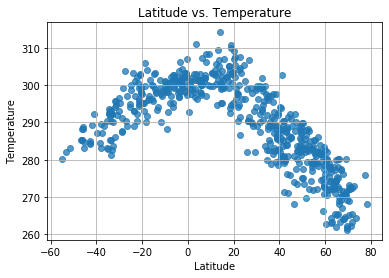

<Figure size 432x288 with 0 Axes>

In [67]:
#pd.read_csv('Weather dataframe.csv')

plt.scatter(weather_df["latitude"],weather_df["temperature"], marker="o", alpha = 0.75)

plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

plt.show()

plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

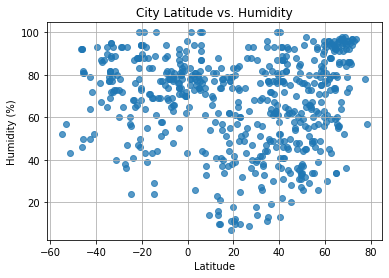

<Figure size 432x288 with 0 Axes>

In [70]:
plt.scatter(weather_df["latitude"],weather_df["humidity"], marker="o", alpha = 0.75)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

plt.savefig("Latvshumidity.png")

## Latitude vs. Cloudiness Plot

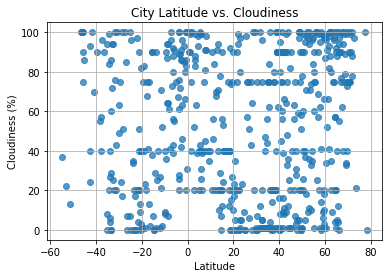

<Figure size 432x288 with 0 Axes>

In [71]:
plt.scatter(weather_df["latitude"],weather_df["cloudiness"], marker="o", alpha = 0.75)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

plt.savefig("LatvsCloudiness.png")

## Latitude vs. Wind Speed Plot

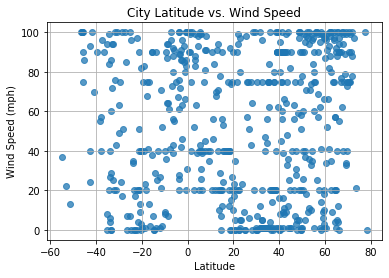

<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(weather_df["latitude"],weather_df["wind speed"], marker="o", alpha = 0.75)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show()

plt.savefig("LatvsWindSpeed.png")

## Linear Regression

In [115]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_regress(xdata, ydata, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)

# Get regression values
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(xdata, ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    
    plt.show()
    
# plt.title(f"Latitude vs. Temperature")
# plt.xlabel("Latitude")
# plt.ylabel("Temperature")



In [112]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = weather_df.loc[weather_df["latitude"] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = weather_df.loc[weather_df["latitude"] < 0.0]
southern_hemisphere.reset_index(inplace=True)

northern_hemisphere.head()

,index,city,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,0,talnakh,69.49,88.40,269.15,79,40,40
1,1,faya,18.39,42.45,292.65,77,0,0
2,6,banda aceh,5.56,95.32,300.01,82,100,100
3,12,pevek,69.70,170.31,261.56,96,73,73
4,14,jintur,19.62,76.70,303.49,18,10,10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

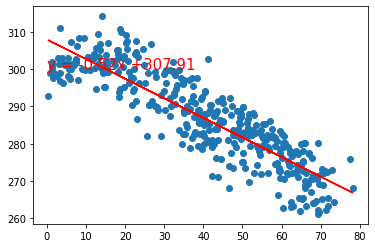

In [116]:
xdata = northern_hemisphere['latitude']
ydata = northern_hemisphere['temperature']


linear_regress(xdata, ydata, (0,300))


In [117]:
### As you approach the equator, average temperature increases.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression